## Base de dados - import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
url = ("https://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic3.xls")
df = pd.read_excel(url)

#### Percentual dos dados ausentes

In [3]:
orig_df = df
df.isnull().mean() * 100


pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

#### Visualizando os dados ausentes e não ausentes para verificar se existe padrão

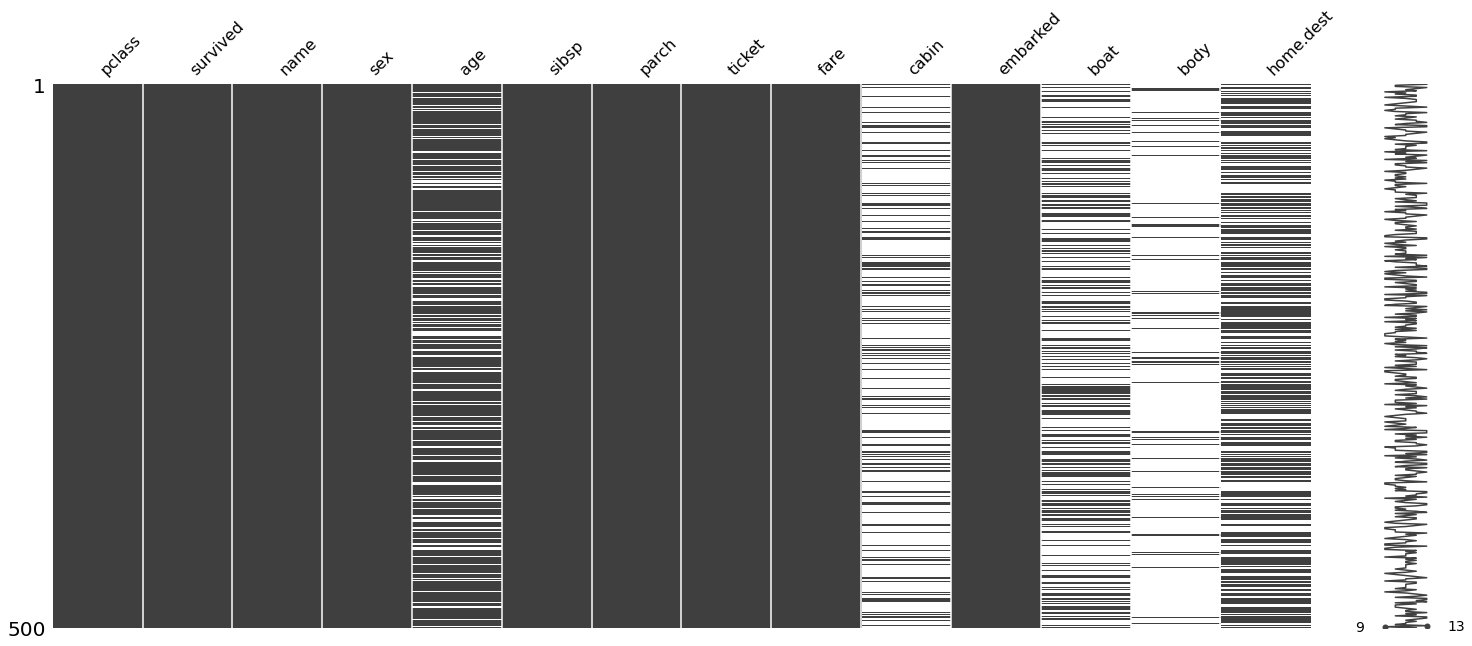

In [4]:
import missingno as msno
ax = msno.matrix(orig_df.sample(500))
ax.get_figure().savefig("./images/mlpr_0401.png")

In [12]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [25]:
plt.style.use('seaborn-darkgrid')

<AxesSubplot:>

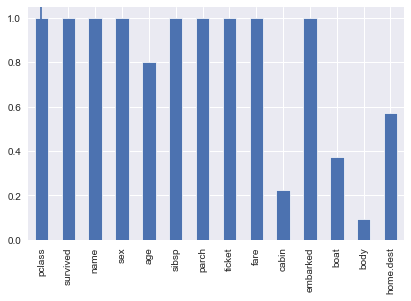

In [28]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.axvline()
(1 - df.isnull().mean()).abs().plot.bar(ax=ax, edgecolor="white", linewidth=0.7)
# Add a vertical line, here we set the style in the function call

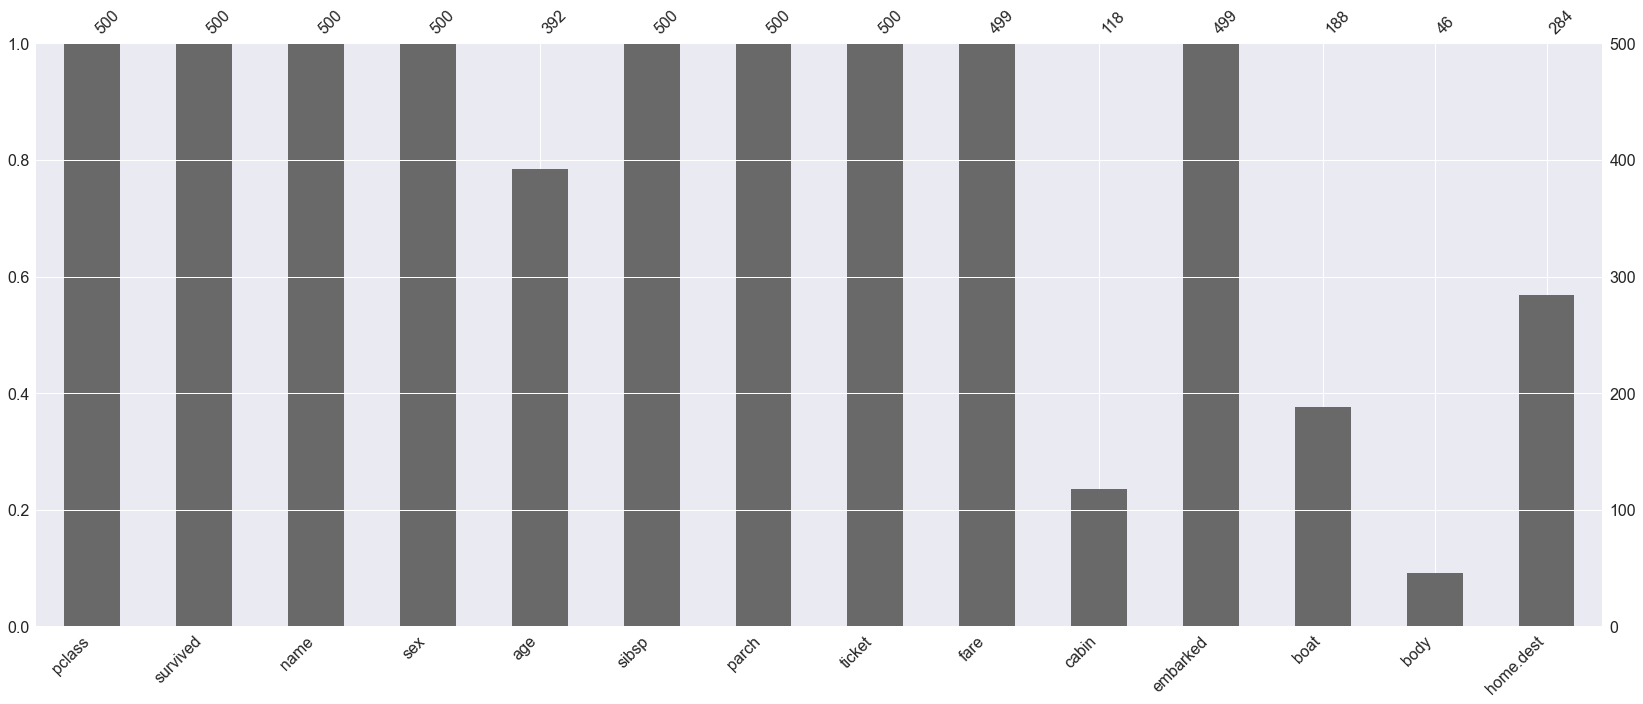

In [27]:
ax = msno.bar(orig_df.sample(500))

#### Análise de correlação entre dados ausentes

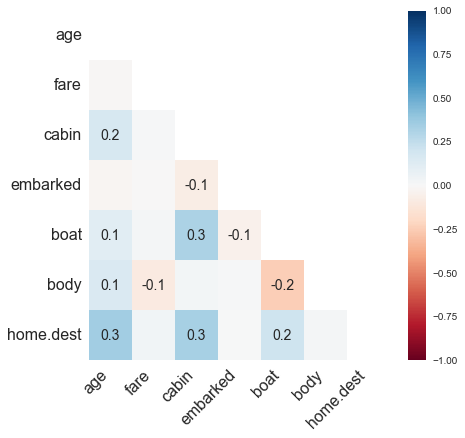

In [45]:
ax = msno.heatmap(df, figsize=(6, 6))
ax.get_figure().savefig("./images/mlpr_0402.png")

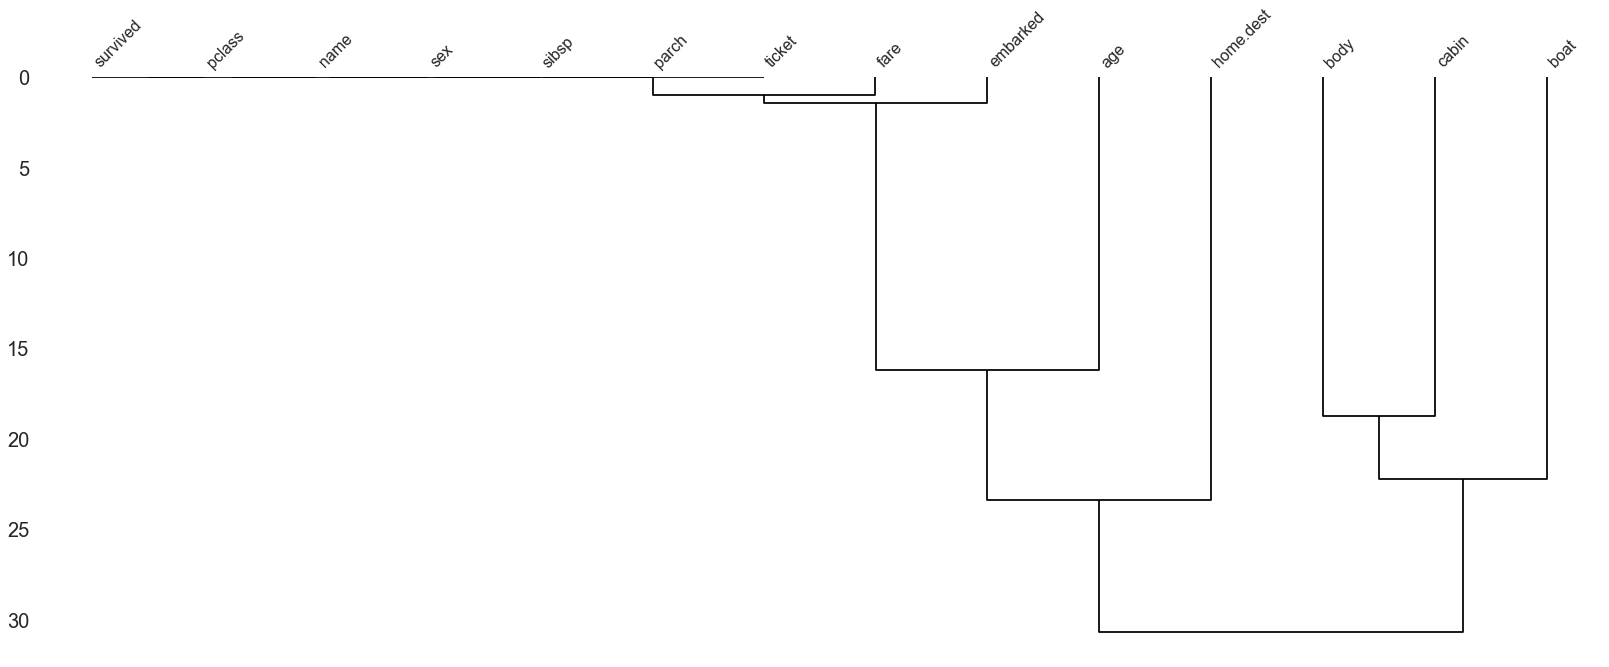

In [46]:
ax = msno.dendrogram(df)
ax.get_figure().savefig("./images/mlpr_0403.png")

### Descarte de dados ausentes

In [47]:
df1 = df.dropna()

In [48]:
df1 = df.drop(columns="cabin")

In [49]:
df1 = df.dropna(axis=1)

### Imputando dados

In [50]:
from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(
    include="number"
).columns
im = SimpleImputer()  # mean
imputed = im.fit_transform(df[num_cols])

### Acrescentando colunas informativas

In [51]:
def add_indicator(col):
    def wrapper(df):
        return df[col].isna().astype(int)

    return wrapper

In [52]:
df1 = df.assign(
    cabin_missing=add_indicator("cabin")
)